# K - Nearest Neighbours

K-Nearest Neighbor (KNN) is a supervised, non-parametric machine learning algorithm used for both classification and regression tasks. It works by finding the 'k' closest data points (neighbors) to a new, unclassified point using a distance metric (like Euclidean distance) and then assigning the new point to the most common class among those neighbors (for classification) or the average value of those neighbors (for regression).

## For classification

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# loading the breast cancer data from the sklearn datasets

data = load_breast_cancer()

print(f"Feature names: {data.feature_names}")
print(f"Target name: {data.target_names}")

X, y = data.data, data.target

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target name: ['malignant' 'benign']


In [6]:
print(X.shape)
print(y.shape)

print(type(X))
print(type(y))

(569, 30)
(569,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
# train test splitting

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratified sampling

In [44]:
print(f"Train size: {x_train.shape[0]}")
print(f"Test size: {x_test.shape[0]}")

Train size: 455
Test size: 114


In [45]:
k_values = [1, 3, 5, 7, 9, 11, 15, 23, 59, 103, 205, 301, 427, 455]

results = []

In [46]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)  # training the model
    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append((k, acc, prec, rec, f1))

In [47]:
print("K  |  Accuracy | Precision | Recall | F1-score")
for r in results:
    print(f"{r[0]:<3}|   {r[1]:.3f}   | {r[2]:.3f}     | {r[3]:.3f}  | {r[4]:.3f}")

K  |  Accuracy | Precision | Recall | F1-score
1  |   0.921   | 0.957     | 0.957  | 0.936
3  |   0.930   | 0.944     | 0.944  | 0.944
5  |   0.912   | 0.943     | 0.943  | 0.930
7  |   0.930   | 0.944     | 0.944  | 0.944
9  |   0.939   | 0.945     | 0.945  | 0.952
11 |   0.939   | 0.945     | 0.945  | 0.952
15 |   0.930   | 0.932     | 0.932  | 0.945
23 |   0.939   | 0.933     | 0.933  | 0.952
59 |   0.930   | 0.921     | 0.921  | 0.946
103|   0.921   | 0.909     | 0.909  | 0.940
205|   0.886   | 0.855     | 0.855  | 0.916
301|   0.860   | 0.818     | 0.818  | 0.900
427|   0.632   | 0.632     | 0.632  | 0.774
455|   0.632   | 0.632     | 0.632  | 0.774


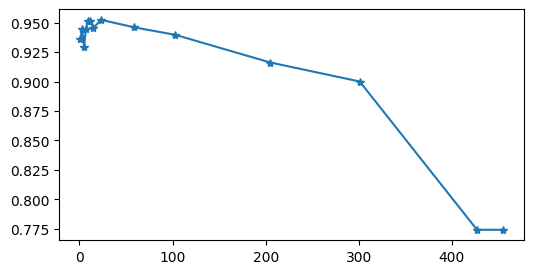

In [52]:
# visualization

from matplotlib import pyplot as plt


f1_scores = [i[4] for i in results]
plt.figure(figsize=(6, 3))
plt.plot(k_values, f1_scores, marker = '*')
plt.show()

We can observe that,
* As k value increases, the f1-score decreases
* Lower k, leads to overfitting
* Higher k, leads to underfitting 

In [53]:
# k = 1 gives 0 train error

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

y_pred_train = knn.predict(x_train)

f1 = f1_score(y_train, y_pred_train) # will get f1socre 1

print(f"F1 socre for k = 1 on train data: {f1}")

F1 socre for k = 1 on train data: 1.0


In [57]:
# gridsearch cv for best k value


param_grid = {"n_neighbors": range(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="f1")
grid.fit(x_train, y_train)

print("Best k value:", grid.best_params_)
print("Best score:", grid.best_score_)

Best k value: {'n_neighbors': 6}
Best score: 0.952785555135953
